<a href="https://colab.research.google.com/github/kiq-caique/inteligencia_artificial_UFV/blob/main/Machine_Learn_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiramente carregando o datasets prontos do sklearn, criando a variável 'iris' para receber todo o dataset.

variável 'x' fica responsável por coletar todas as linhas do data set + as colunas de ÍNDICE 2 e 3.

In [2]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = datasets.load_iris()


x = iris["data"][:,(2,3)] #petal length, petal width
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Visualizar o dataset como uma tabela (Lembrando q a ultima coluna foi tranformada em dataframa por isso o nomes foram substituidos por 0, 1 e 2)
# iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# iris_df

svm_clf = SVC(kernel = 'linear', C=1e6)
svm_clf.fit(x,y)


SVC(C=1000000.0, kernel='linear')

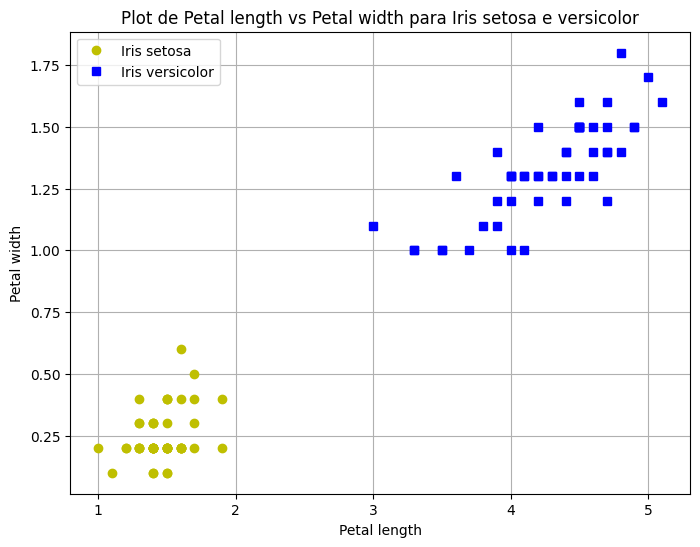

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(x[y == 0][:, 0], x[y == 0][:, 1], "yo", label="Iris setosa")  # Plotar setosa
plt.plot(x[y == 1][:, 0], x[y == 1][:, 1], "bs", label="Iris versicolor")  # Plotar versicolor
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.title("Plot de Petal length vs Petal width para Iris setosa e versicolor")
plt.grid(True)
plt.show()

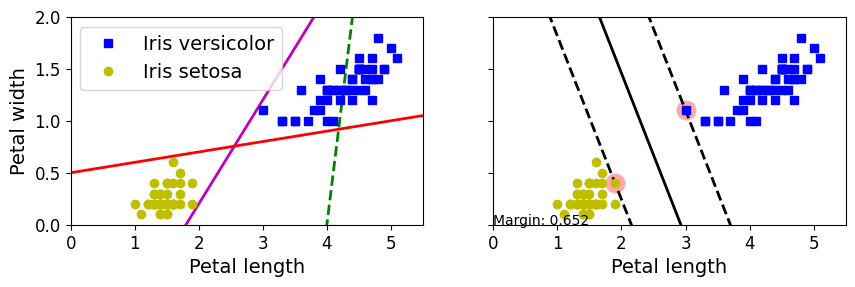

In [ ]:
# Criando função para plotar as fronteiras de classificacao (vetor de suporte e hiperplano de suporte)
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Na fronteira de decisao, w0*x0 + w1*x1 + b = 0
    # Hiperplano de decisao => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1] # para efeito visual
    margin_dist = 1/np.linalg.norm(w,2) # margem real do algoritmo

    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA') #identifica os pontos do vetor de suporte
    plt.plot(x0, decision_boundary, "k-", linewidth=2) #hiperplano de suporte
    plt.plot(x0, gutter_up, "k--", linewidth=2) # vetor de suporte +1
    plt.plot(x0, gutter_down, "k--", linewidth=2) # vetor de suporte -1
    plt.annotate('Margin: {}'.format(round(margin_dist,3)),(xmin,xmin)) #exibe o valor da margem de separação

# Criando retas de classificacao para o espaco de caracteristicas
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

# Configurando a figura com subplots
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True) # sharey -> compartilhar eixo y

plt.sca(axes[0]) # subplot 0 - retas pred_1, pred_2 e pred_3
plt.plot(x0, pred_1, "g--", linewidth=2) # reta verde tracejada
plt.plot(x0, pred_2, "m-", linewidth=2) # reta magenta continua
plt.plot(x0, pred_3, "r-", linewidth=2) # reta vermelha continua
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1]) # subplot 1 - Classificador SVM linear
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])


plt.show()